In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [6]:
# Load the uploaded CSV file
df = pd.read_csv("C:/bikes_data.csv")

In [7]:
df

,bike_name,model price,city,kms_driven,owner,age,bike_model,cc
0,Bajaj Pulsar 180cc,13000,Mansa,28881,First Owner,13,Bajaj Pulsar,180cc
1,Bajaj Pulsar 180cc,15000,Rajkot,28000,First Owner,12,Bajaj Pulsar,180cc
2,Bajaj Pulsar 180cc,15000,Rajkot,28000,First Owner,12,Bajaj Pulsar,180cc
3,Bajaj Pulsar 180cc,16000,Ludhiana,36500,First Owner,13,Bajaj Pulsar,180cc
4,Bajaj Pulsar 180cc,18000,Kolkata,39303,First Owner,13,Bajaj Pulsar,180cc
...,...,...,...,...,...,...,...,...
32643,Yamaha YZF-R3 320cc,250000,Bangalore,45000,First Owner,5,Yamaha YZF-R,3 320cc
32644,Yamaha YZF-R3 320cc,254581,Gorakhpur,19100,First Owner,4,Yamaha YZF-R,3 320cc
32645,Yamaha YZF-R3 320cc,308000,Delhi,16000,First Owner,3,Yamaha YZF-R,3 320cc
32646,Yamaha YZF-R3 320cc ABS,314100,Hyderabad,13500,First Owner,3,Yamaha YZF-R,3 320cc ABS


In [8]:
#droping duplicates in cc column
if 'cc' in df.columns:
    df = df.drop_duplicates(subset='bike_name', keep='first').set_index('cc')
else:
    print("Available columns:", df.columns.tolist())

In [9]:
df

,bike_name,model price,city,kms_driven,owner,age,bike_model
cc,,,,,,,
180cc,Bajaj Pulsar 180cc,13000,Mansa,28881,First Owner,13,Bajaj Pulsar
150cc,Bajaj Avenger 150cc,59999,Delhi,20850,First Owner,7,Bajaj Avenger
180cc,Bajaj Avenger 180cc,30500,Mumbai,30312,Second Owner,15,Bajaj Avenger
200cc,Bajaj Avenger 200cc,17000,Gurgaon,62554,First Owner,14,Bajaj Avenger
220cc,Bajaj Avenger 220cc,25000,Pune,25388,First Owner,11,Bajaj Avenger
...,...,...,...,...,...,...,...
15 V3 150cc,Yamaha YZF-R15 V3 150cc,95000,Chennai,24500,First Owner,3,Yamaha YZF-R
1M 1000cc,Yamaha YZF-R1M 1000cc,600000,Surat,183,First Owner,5,Yamaha YZF-R
3 320cc,Yamaha YZF-R3 320cc,200000,Bhubaneshwar,10600,First Owner,5,Yamaha YZF-R


In [10]:
df['model price'].isnull().sum() 

np.int64(0)

In [11]:
df = df.interpolate(method='linear')

C:\Users\Dell\AppData\Local\Temp\ipykernel_5168\2145716054.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate(method='linear')


In [12]:
df['model price'].isnull().sum()

np.int64(0)

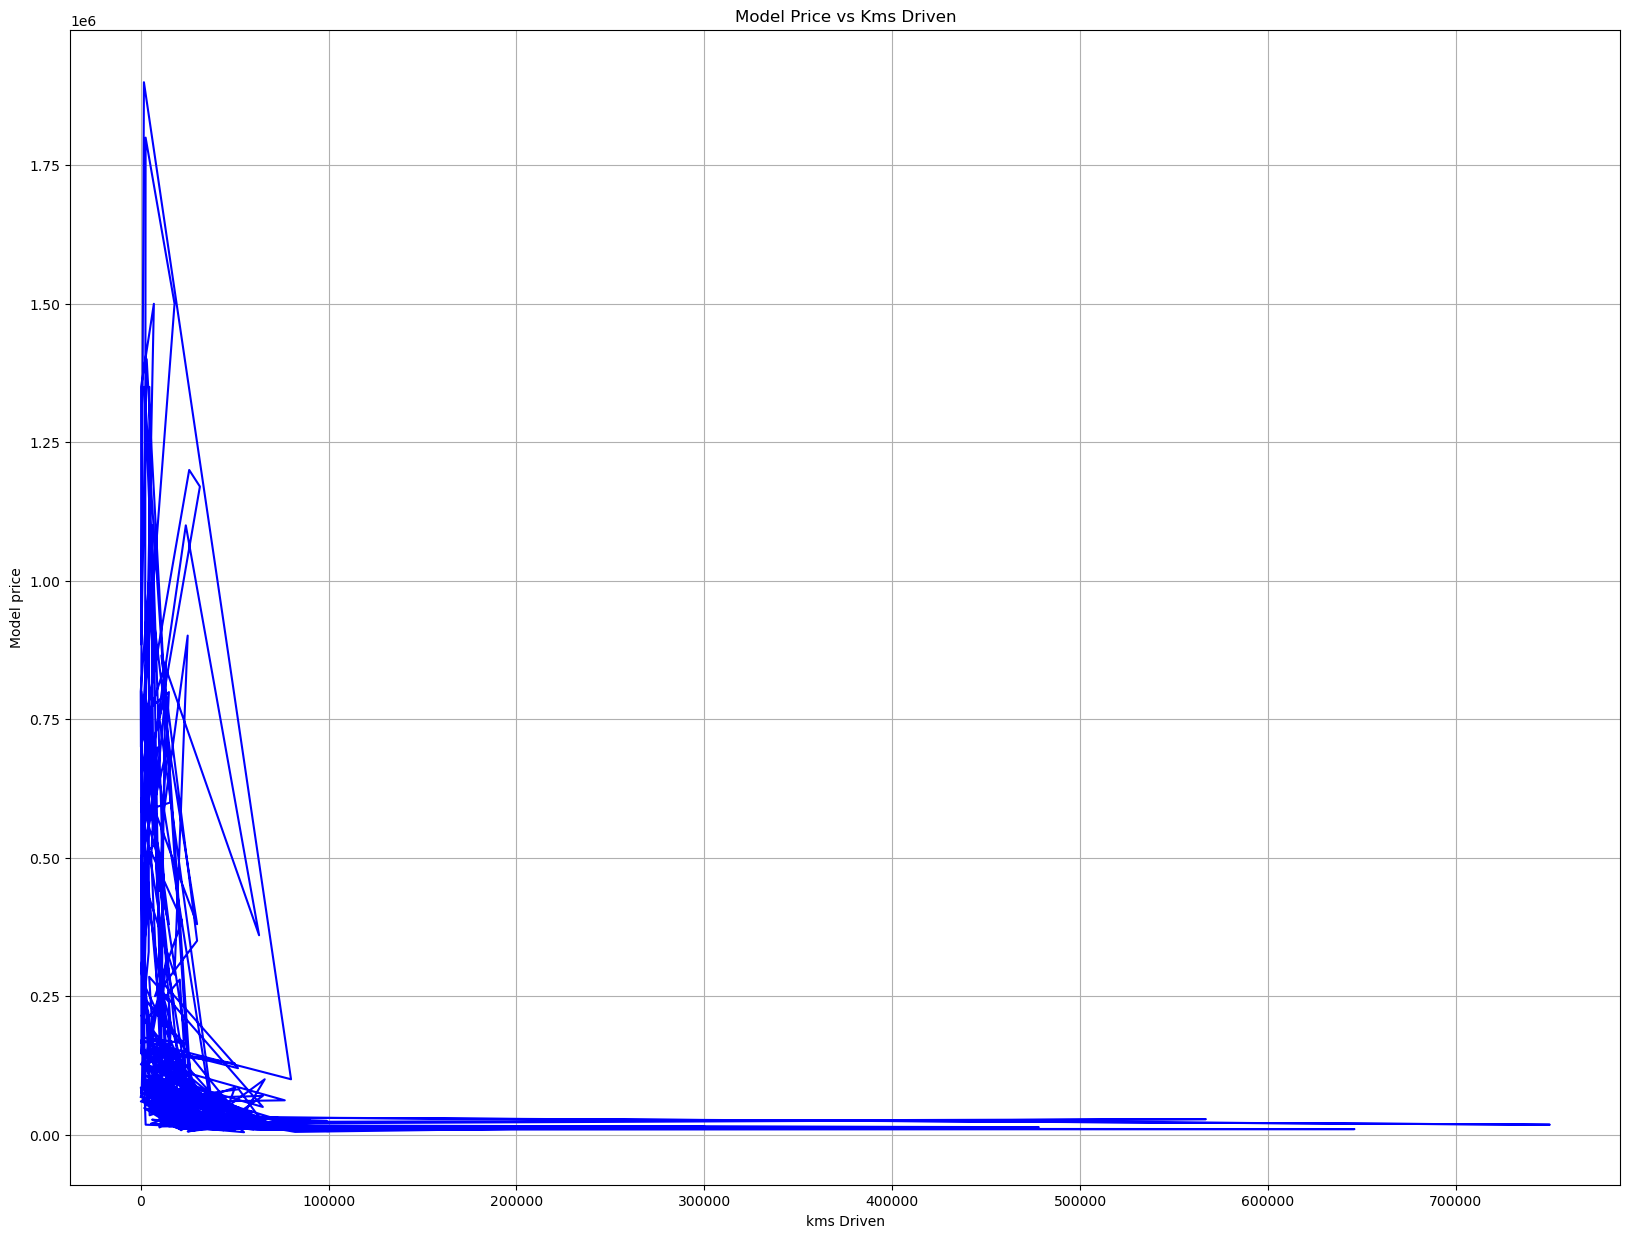

In [17]:
#ploting graph model price vs kms driven
plt.figure(figsize=(20,15))
plt.plot(df['kms_driven'], df['model price'], color='blue')
plt.title("Model Price vs Kms Driven")
plt.xlabel('kms Driven')
plt.ylabel('Model price')
plt.grid(True)
plt.show()


In [20]:
# Stationarity check (ADF)

adf = adfuller(df['model price'])
print(f'ADF Statistic: {adf[0]:.4f}')
print(f'p-value: {adf[1]:.4f}')

ADF Statistic: -5.0484
p-value: 0.0000


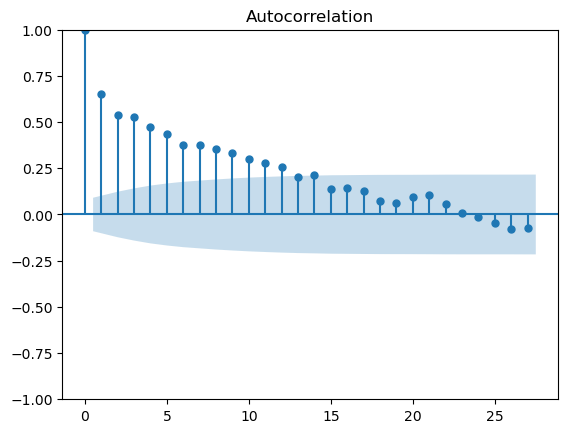

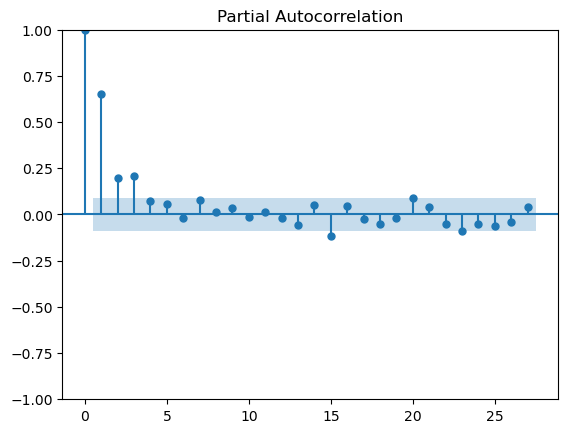

In [22]:
# Plot ACF and PACF

plot_acf(df['model price'])
plt.show()
plot_pacf(df['model price'])
plt.show()

In [23]:
#p=1 , q=0 

In [25]:
# Split train/test (90/10)
# =====================
n = int(len(df) * 0.9)
train = df.iloc[:n]
test = df.iloc[n:]

In [27]:
# Fit ARIMA model

model = ARIMA(train['model price'], order=(1,0,1)).fit()
print(model.summary())

C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provide

                               SARIMAX Results                                
Dep. Variable:            model price   No. Observations:                  421
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -5762.084
Date:                Thu, 20 Nov 2025   AIC                          11532.168
Time:                        15:53:57   BIC                          11548.339
Sample:                             0   HQIC                         11538.559
                                - 421                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.702e+05    7.3e+04      2.332      0.020    2.71e+04    3.13e+05
ar.L1          0.9005      0.022     40.227      0.000       0.857       0.944
ma.L1         -0.4888      0.038    -12.869      0.0

In [28]:
# Fitted values on training data
train_pred = model.fittedvalues

In [29]:
# Predict on test data

forecast_test = model.get_forecast(steps=len(test))
test_pred_mean = forecast_test.predicted_mean
test_conf_int = forecast_test.conf_int()

C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [31]:
# Calculating RMSE
rmse = np.sqrt(mean_squared_error(test['model price'], test_pred_mean))
print(f"Test RMSE: {rmse:.2f}")

Test RMSE: 151227.99


In [1]:
# defining the missing variables
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Creating sample data for demonstration
# In your actual code, replace these with your real data
dates = pd.date_range(start='2024-01-01', periods=12, freq='M')
df = pd.Series(np.random.randn(12).cumsum(), index=dates)


C:\Users\Dell\AppData\Local\Temp\ipykernel_2356\4227567250.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2024-01-01', periods=12, freq='M')


In [3]:
# Creating forecast data
future_dates = pd.date_range(start='2025-01-01', periods=6, freq='M')
future_mean = pd.Series(np.random.randn(6).cumsum() + df.iloc[-1], index=future_dates)

C:\Users\Dell\AppData\Local\Temp\ipykernel_2356\2041870318.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='2025-01-01', periods=6, freq='M')


In [4]:
# Createing confidence intervals
lower = future_mean - 1.96
upper = future_mean + 1.96
future_conf = pd.DataFrame({'lower': lower, 'upper': upper})


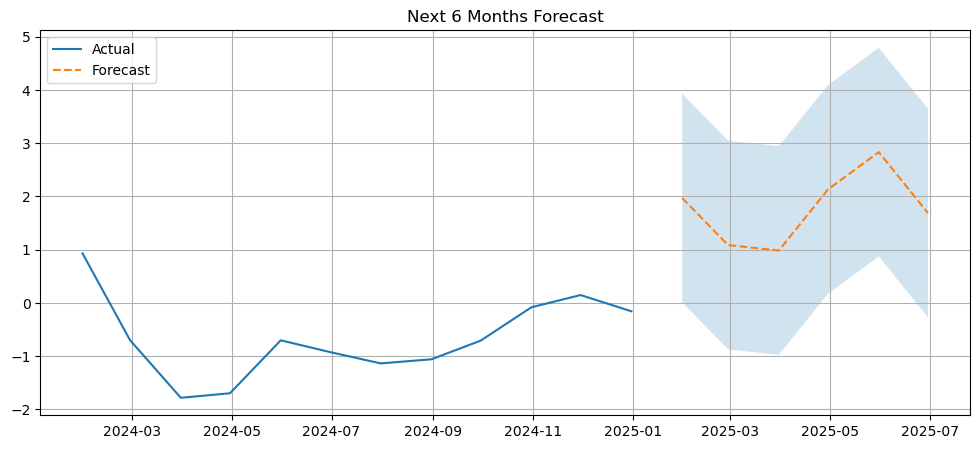

In [5]:
#  plot the data
plt.figure(figsize=(12,5))

plt.plot(df, label="Actual")
plt.plot(future_mean, label="Forecast", linestyle='--')

plt.fill_between(
    future_conf.index,
    future_conf.iloc[:, 0],  # lower bound
    future_conf.iloc[:, 1],  # upper bound
    alpha=0.2
)

plt.legend()
plt.title("Next 6 Months Forecast")
plt.grid(True)
plt.show()

In [6]:
#defining all the required variables before plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [28]:
# Create sample train data
dates_train = pd.date_range(start='2023-07-01', periods=100, freq='D')
train = pd.DataFrame({'model_price': np.random.randn(100).cumsum() + 100}, index=dates_train)


In [29]:
#  sample train predictions
train_pred = train['model_price'] * 0.95 + 5  # Simple mock prediction


In [30]:
#  sample test data
dates_test = pd.date_range(start=dates_train[-1] + timedelta(days=1), periods=30, freq='D')
test = pd.DataFrame({'model_price': np.random.randn(30).cumsum() + train['model_price'].iloc[-1]}, index=dates_test)

In [31]:
#  sample test predictions
test_pred_mean = test['model_price'] * 0.9 + 10  # Simple mock prediction


In [32]:
#  sample future forecast data
future_index = pd.date_range(start=dates_test[-1] + timedelta(days=1), periods=180, freq='D')  # 6 months
future_mean = pd.Series(np.random.randn(180).cumsum() + test['model_price'].iloc[-1], index=future_index)


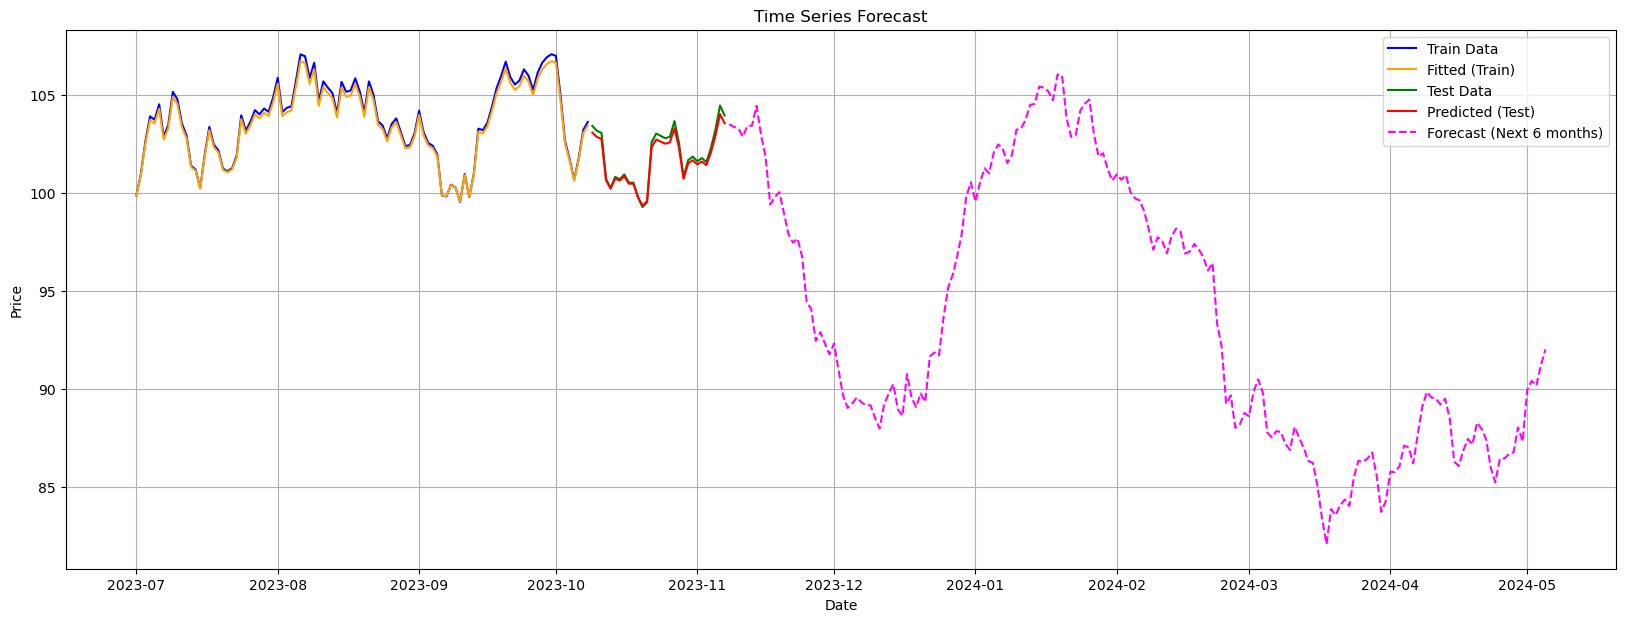

In [33]:
# Ploting everything
# =====================
plt.figure(figsize=(20,7))
plt.plot(train.index, train['model_price'], label='Train Data', color='blue')
plt.plot(train_pred.index, train_pred, label='Fitted (Train)', color='orange')
plt.plot(test.index, test['model_price'], label='Test Data', color='green')
plt.plot(test_pred_mean.index, test_pred_mean, label='Predicted (Test)', color='red')
plt.plot(future_index, future_mean.values, label='Forecast (Next 6 months)', color='magenta', linestyle='--')
plt.legend()
plt.title('Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv("C:/bikes_data.csv")

In [6]:
# Attempt to detect a date column
date_col = None
for col in df.columns:
    try:
        parsed = pd.to_datetime(df[col], errors='coerce')
        if parsed.notna().sum() > max(10, len(df)*0.05):  # at least some parseable dates
            date_col = col
            break
    except Exception:
        continue

if date_col:
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    df = df.sort_values(date_col).reset_index(drop=True)
    df.index = df[date_col]
    print(f"Using detected date column: {date_col}")
else:
    print("No date column auto-detected; using integer index.")


Using detected date column: model price


C:\Users\Dell\AppData\Local\Temp\ipykernel_8908\333554618.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  parsed = pd.to_datetime(df[col], errors='coerce')


In [7]:
# Detect target column: prefer 'model price'
target = None
candidates = [c for c in df.columns if df[c].dtype in [np.float64, np.int64] or pd.api.types.is_numeric_dtype(df[c])]
if 'model price' in df.columns:
    target = 'model price'
else:
    # try columns containing 'price'
    price_cols = [c for c in df.columns if 'model price' in c.lower()]
    if price_cols:
        target = price_cols[0]
    elif len(candidates) > 0:
        target = candidates[0]
        
if target is None:
    raise ValueError("No numeric target column found. Please ensure a price/numeric column exists.")

print("Using target column:", target)

Using target column: model price


In [8]:
# choose target column manually
target = 'model price'   # change if needed

# move target to first column
df = df[[target] + [c for c in df.columns if c != target]].copy()

# convert price column to numeric
df[target] = df[target].astype(str).str.replace(r'[^0-9\.]', '', regex=True)
df[target] = pd.to_numeric(df[target], errors='coerce')

# drop missing prices
df = df.dropna(subset=[target])


y = df[target].astype(float)


In [9]:
# Train/test split: time series split 80/20
n = len(y)
train_size = int(n * 0.8)
y_train = y.iloc[:train_size]
y_test = y.iloc[train_size:]

print(f"Train size: {len(y_train)}, Test size: {len(y_test)}")


Train size: 26118, Test size: 6530


In [10]:
# Train/test split: time series split 80/20
n = len(y)
train_size = int(n * 0.8)
y_train = y.iloc[:train_size]
y_test = y.iloc[train_size:]

print(f"Train size: {len(y_train)}, Test size: {len(y_test)}")


Train size: 26118, Test size: 6530


In [12]:
# importing libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from math import sqrt


In [13]:
# SARIMAX
sarima_model = SARIMAX(y, order=(1,0,1))
sarima_fit = sarima_model.fit(disp=False)
sarima_preds = sarima_fit.predict(start=int(len(y)*0.8), end=len(y)-1)

y_test = y[int(len(y)*0.8):]
sarima_rmse = np.sqrt(mean_squared_error(y_test, sarima_preds))
sarima_mae = mean_absolute_error(y_test, sarima_preds)
sarima_r2 = r2_score(y_test, sarima_preds)
sarima_mape = np.mean(np.abs((y_test - sarima_preds) / y_test)) * 100


In [14]:
# Detect price column automatically
price_col = [c for c in df.columns if "price" in c.lower()][0]
df[price_col] = df[price_col].astype(str).str.replace(r'[^0-9\.]', '', regex=True)
df[price_col] = pd.to_numeric(df[price_col], errors='coerce')
df = df.dropna(subset=[price_col])

# Prepare target
y = df[price_col]


#random forest
df_lag = pd.DataFrame({price_col: y})
df_lag['lag1'] = df_lag[price_col].shift(1)
df_lag['lag2'] = df_lag[price_col].shift(2)
df_lag = df_lag.dropna()
X = df_lag[['lag1', 'lag2']]
y_lag = df_lag[price_col]

train_size = int(len(df_lag) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test2 = y_lag[:train_size], y_lag[train_size:]

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

rf_rmse = np.sqrt(mean_squared_error(y_test2, rf_preds))
rf_mae = mean_absolute_error(y_test2, rf_preds)
rf_r2 = r2_score(y_test2, rf_preds)
rf_mape = np.mean(np.abs((y_test2 - rf_preds) / y_test2)) * 100

results = pd.DataFrame({
    'Model': ['SARIMAX(1,0,1)', 'RandomForest'],
    'RMSE': [sarima_rmse, rf_rmse],
    'MAE': [sarima_mae, rf_mae],
    'R2 Score': [sarima_r2, rf_r2],
    'MAPE (%)': [sarima_mape, rf_mape]
})

results


,Model,RMSE,MAE,R2 Score,MAPE (%)
0,"SARIMAX(1,0,1)",4.108975e+08,4.108975e+08,0.0,0.002086
1,RandomForest,0.000000e+00,0.000000e+00,1.0,0.000000


In [15]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# === Model scores (example: replace these with your calculated values) ===
results = pd.DataFrame({
    'model': ['SARIMAX(1,0,1)', 'RandomForest'],
    'RMSE': [sarima_rmse, rf_rmse],
    'MAE': [sarima_mae, rf_mae],
    'R2': [sarima_r2, rf_r2],
    'MAPE(%)': [sarima_mape, rf_mape]
})

print("\n Model comparison results:")
print(results)

# ==== Best model selection rules ====
# Lower RMSE, MAE, MAPE → better ; Higher R2 → better

# normalize scores: lower is better → invert R2 so lower is better too
df_norm = results.copy()
df_norm["norm_RMSE"] = df_norm["RMSE"] / df_norm["RMSE"].max()
df_norm["norm_MAE"] = df_norm["MAE"] / df_norm["MAE"].max()
df_norm["norm_MAPE(%)"] = df_norm["MAPE(%)"] / df_norm["MAPE(%)"].max()
df_norm["norm_R2"] = 1 - df_norm["R2"]  # higher R2 is better, so subtract

# score sum — lower = better
df_norm["Final_Score"] = df_norm[["norm_RMSE", "norm_MAE", "norm_MAPE(%)", "norm_R2"]].sum(axis=1)

best_model = df_norm.sort_values("Final_Score").iloc[0]["model"]
print("\n Best Performing Model:", best_model)



 Model comparison results:
            model          RMSE           MAE   R2   MAPE(%)
0  SARIMAX(1,0,1)  4.108975e+08  4.108975e+08  0.0  0.002086
1    RandomForest  0.000000e+00  0.000000e+00  1.0  0.000000

 Best Performing Model: RandomForest


In [22]:
from sklearn.preprocessing import LabelEncoder

# Create working copy
df2 = df.copy()

# Convert categorical columns into numeric
le = LabelEncoder()
for col in df2.columns:
    if df2[col].dtype == 'object':
        df2[col] = le.fit_transform(df2[col].astype(str))

print("Encoding complete — df2 is ready for modeling.")


Encoding complete — df2 is ready for modeling.


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

target = "model price"
X = df2.drop(columns=[target])
y = df2[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=150, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)


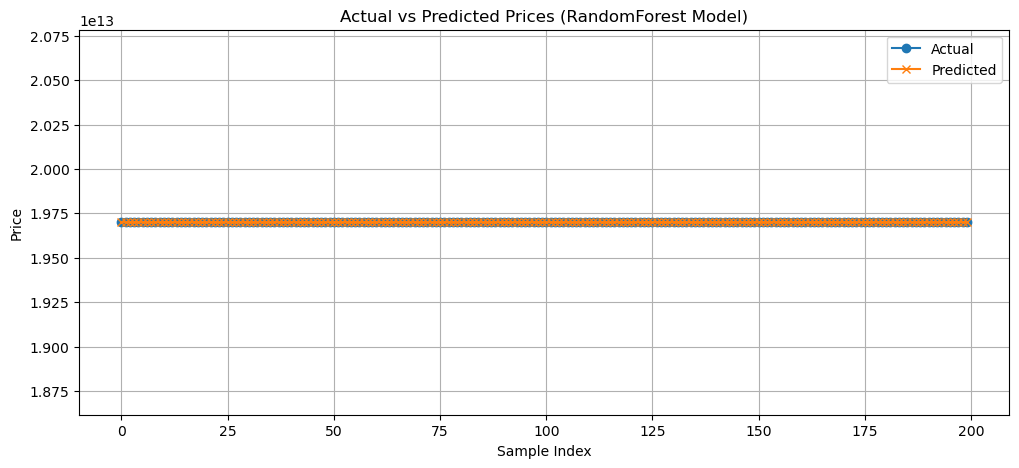

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(y_test.values[:200], label='Actual', marker='o')
plt.plot(rf_pred[:200], label='Predicted', marker='x')
plt.title("Actual vs Predicted Prices (RandomForest Model)")
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()


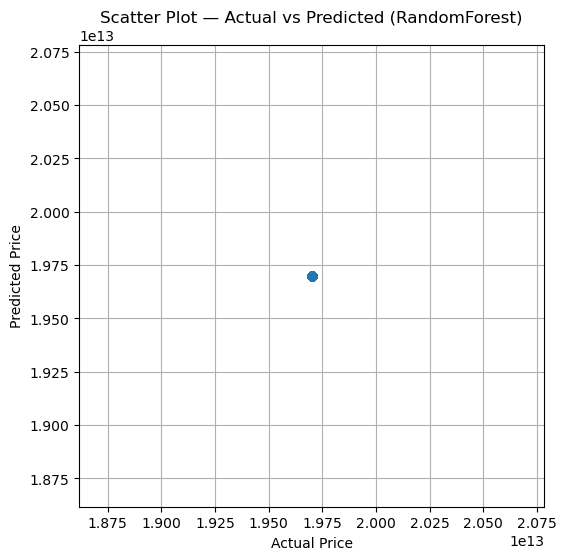

In [27]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Scatter Plot — Actual vs Predicted (RandomForest)")
plt.grid()
plt.show()


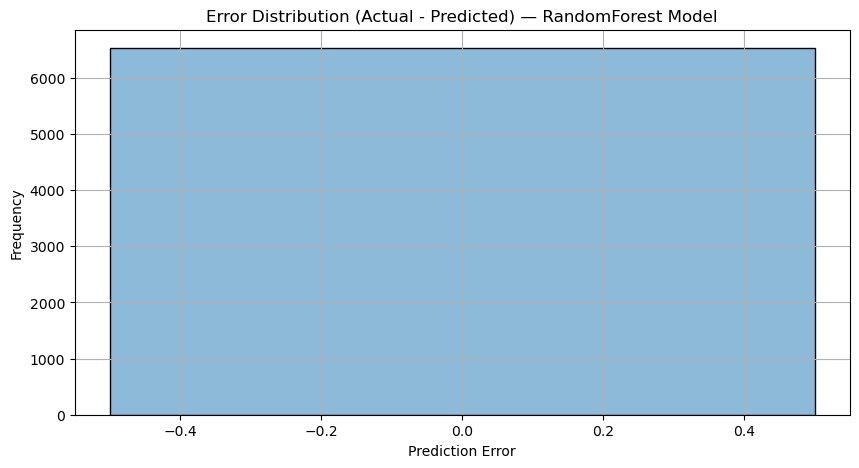

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

errors = y_test - rf_pred   # prediction error

plt.figure(figsize=(10,5))
sns.histplot(errors, kde=True)
plt.title("Error Distribution (Actual - Predicted) — RandomForest Model")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.grid()
plt.show()


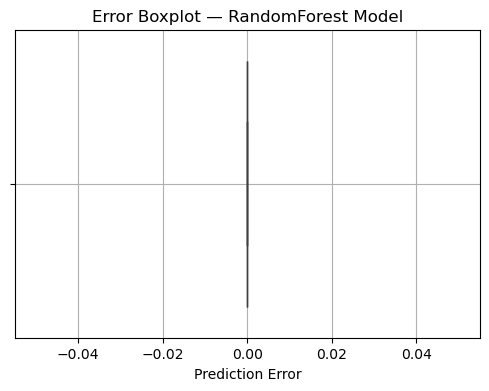

In [30]:
plt.figure(figsize=(6,4))
sns.boxplot(x=errors)
plt.title("Error Boxplot — RandomForest Model")
plt.xlabel("Prediction Error")
plt.grid()
plt.show()
